# Classification and Regression Trees


In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

import missingno as msno

import matplotlib.pylab as plt

from dmba import plotDecisionTree, classificationSummary, regressionSummary

#### The Home Loan dataset allows us to predict who will have their loans approved.

In [ ]:
data_df = pd.read_csv('../resource/lib/public/Loan_data.csv')

In [ ]:
# Show the first five lines of the dataset



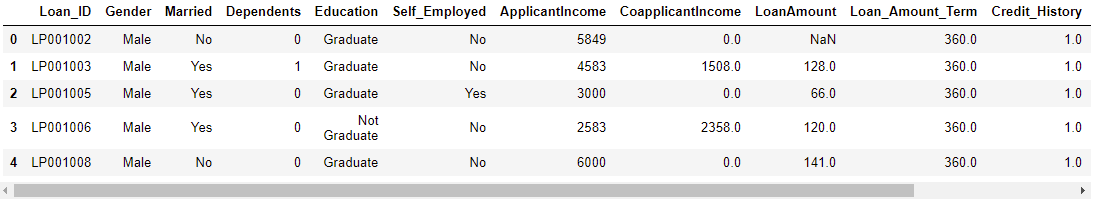

In [ ]:
# Remove the non-informational variable(s) from the data and show the remaining variables



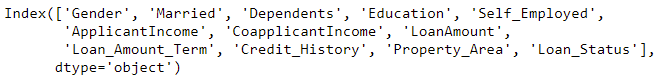

In [ ]:
# Show the variable names, non-null counts, and datatypes



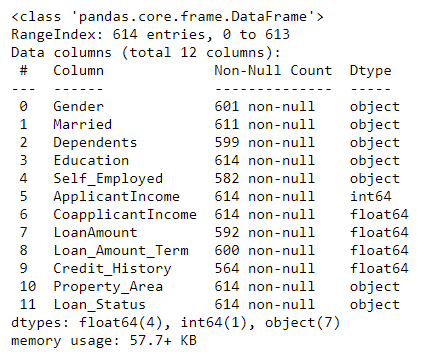

In [ ]:
# Create the X and y objects

X = data_df.???(???, axis=1)

y = data_df[???]

In [ ]:
# Show the count of values in the response variable



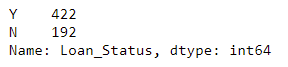

In [ ]:
# One-hot encode the predictors for tree models



In [ ]:
# Show the number of samples and predictors in the X object after dummy coding



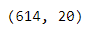

In [ ]:
# Impute missing values in the X object and save it into a new object name

from sklearn.impute import KNNImputer

imputer = KNNImputer()

X_imp = ???.fit_transform(???)

X_imp = pd.DataFrame(X_imp, columns=X.columns) # we do this to preserve the original variable names

In [ ]:
# Verify that all missing values are imputed by using a missing value bar chart

%matplotlib inline

msno.???(???, color="darkorange")

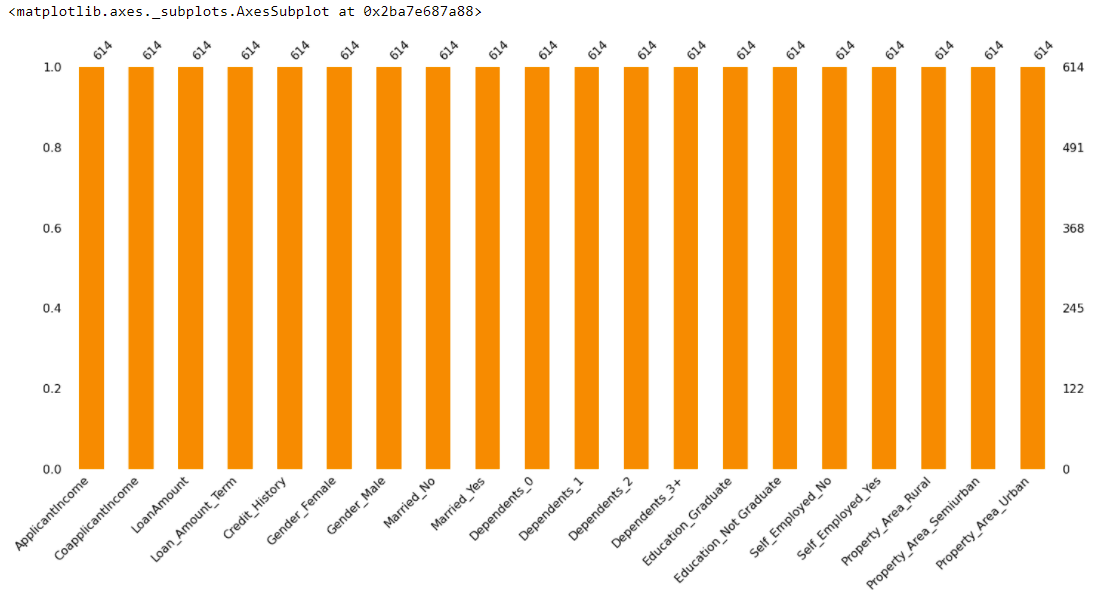

#### The fit function accepts the X objects (predictors) first followed by the response variable. Notice how they created both the X and y objects within the fit function itself.

In [ ]:
classTree = DecisionTreeClassifier(random_state=1, max_depth=3)

classTree.???(???, ???)

#### The first line of code prints the classes of the response variable. The second line generates a plot of the decision tree structure. Note how feature names and class names are required to create this diagram.

In [ ]:
print("Classes: {}".format(', '.join(classTree.classes_)))

plotDecisionTree(classTree, feature_names=X.columns,class_names=classTree.classes_)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

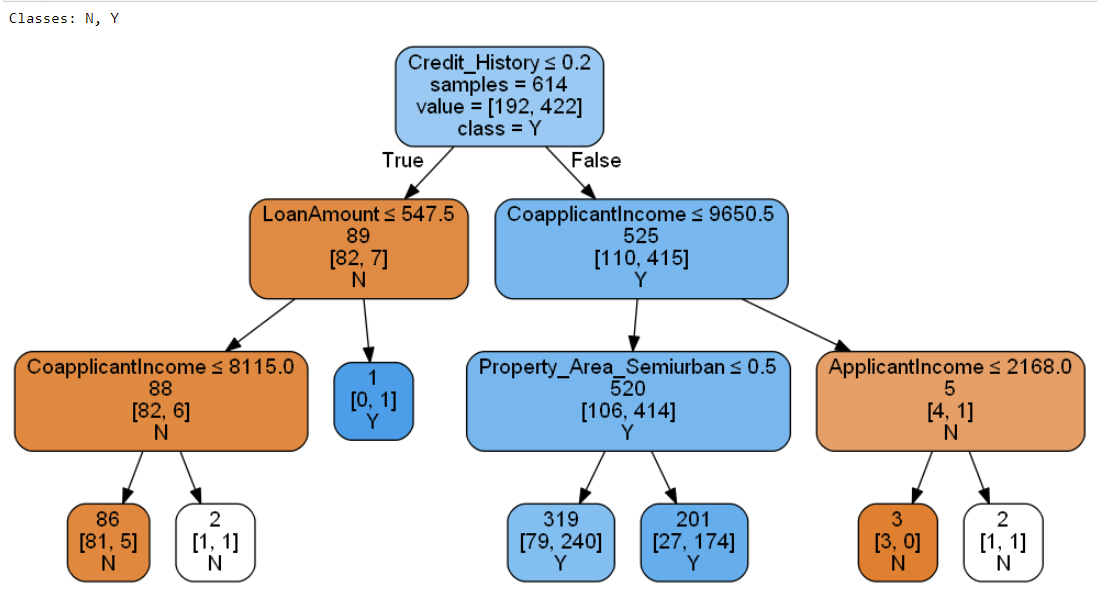

## Figure 9.8
Grow tree fully by changing the max_depth=3 parameter to max_depth = 6; this will allow the tree to overfit. It also shows how a complex tree can be difficult to interpret.

In [ ]:
classTree = DecisionTreeClassifier(random_state=1)

???.fit(???, ???)

print("Classes: {}".format(', '.join(classTree.classes_)))

plotDecisionTree(classTree, feature_names=X.columns, class_names=classTree.classes_, rotate=True)

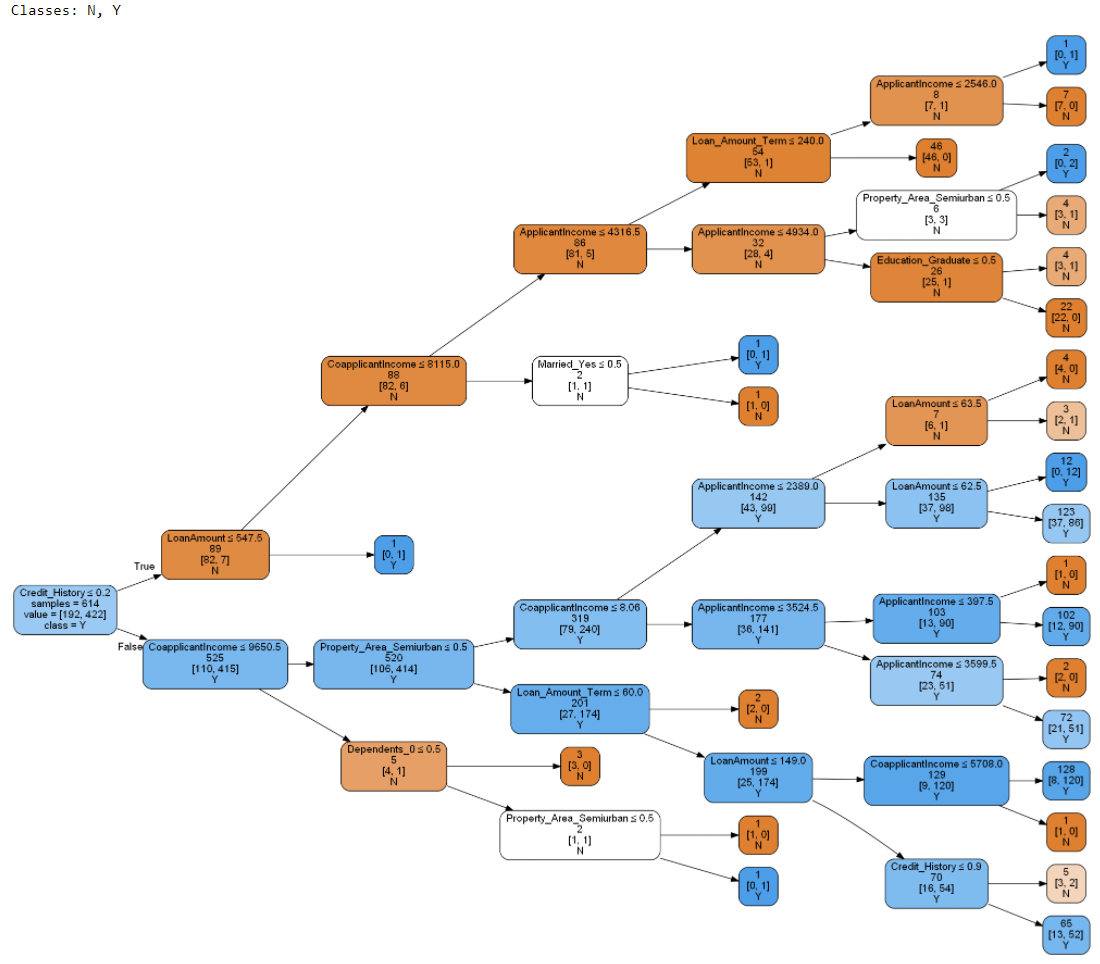

#### Create a train/test split and check model performance

In [ ]:
# Split the data into training and test with 50% for each, random seed = 1, and stratified y



In [ ]:
# Now we impute missing values in the training predictors and map those to the test data

from sklearn.impute import KNNImputer

imputer = KNNImputer()

train_X = imputer.???(train_X)
test_X = imputer.???(test_X)

train_X = pd.DataFrame(train_X, columns=X.columns)

#### There is no depth parameter, so this tree will overfit the training data.

In [ ]:
fullClassTree = DecisionTreeClassifier()

fullClassTree.???(???, ???)

plotDecisionTree(fullClassTree, feature_names=X.columns)

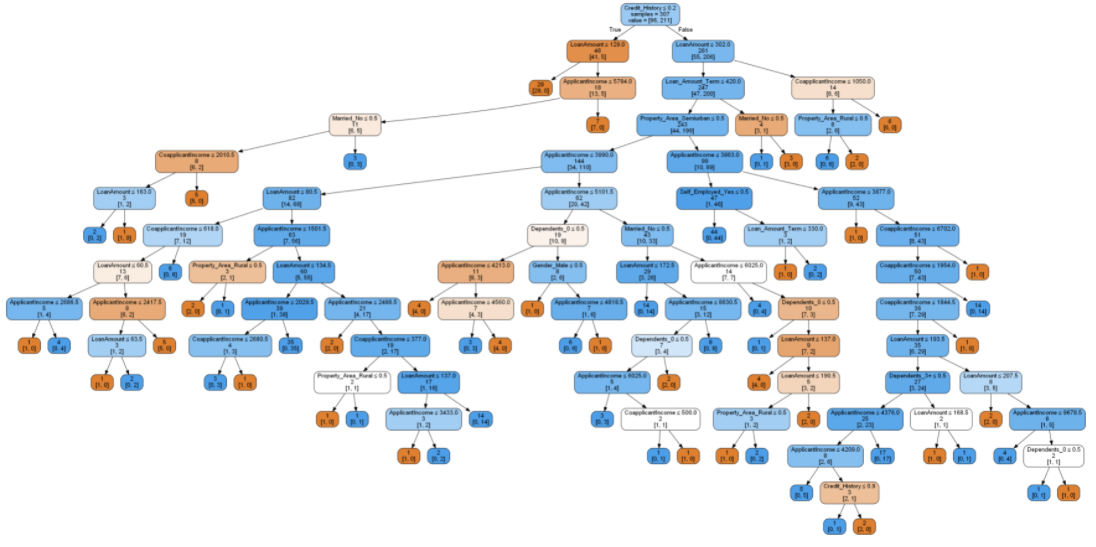

#### First confusion matrix is training; second is for test data

In [ ]:
classificationSummary(train_y, fullClassTree.???(???))
print()
classificationSummary(???, ???.predict(test_X))

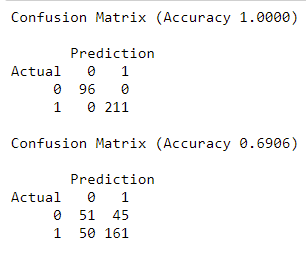

#### Now we are using hyperparameters to control stopping ( and thereby prevent overfitting); we're setting a max depth, a minimum samples before a node can split, and a minimum impurity decrease before another split is allowed.¶

In [ ]:
smallClassTree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_impurity_decrease=0.01)

smallClassTree.fit(???, ???)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

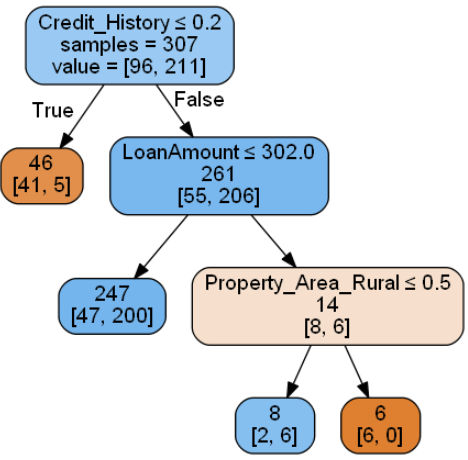

In [ ]:
classificationSummary(???, ???.predict(???))
print()
classificationSummary(???, smallClassTree.???(???))

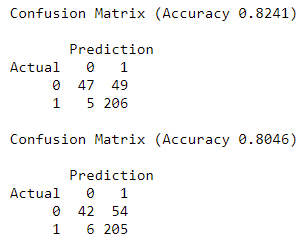

### Grid search for Early Stopping

#### Grid search combines cross-validation with hyperparameter searching; grid search works well when you know the ranges of the hyperparameters that you want to check. 

In [ ]:
# Start with an initial guess for parameters

param_grid = {
    'max_depth': [10, 20, 30], 
    'min_samples_split': [10, 15, 20], 
    'min_impurity_decrease': [0, 0.0001, 0.001, 0.01],
    'random_state': [1],
}

#### Using a DecisionTreeClassifier with 10-fold CV

In [ ]:
gridSearch = GridSearchCV(???, ???, cv=???)

gridSearch.fit(train_X, train_y)

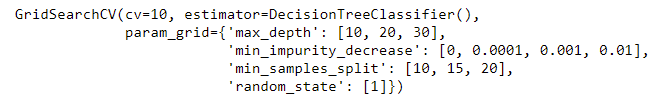

In [ ]:
print('Initial score: ', gridSearch.???)

print('Initial parameters: ', gridSearch.???)

InitialTree = gridSearch.???

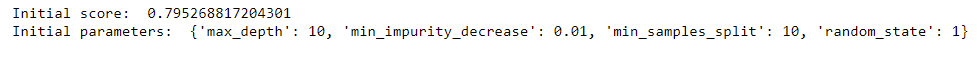

In [ ]:
classificationSummary(train_y, ???.predict(train_X))
print()
classificationSummary(test_y, InitialTree.???(test_X))

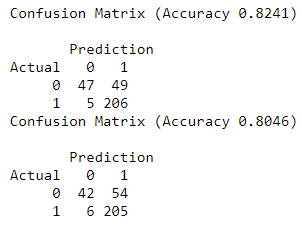

#### Based on the initial results, we can refine our hyperparameter grid search to look for values around the best estimates.

In [ ]:
# Adapt grid based on result from initial grid search

param_grid = {
    'max_depth': list(range(2, 12)), 
    'min_samples_split': list(range(2, 12)), 
    'min_impurity_decrease': [0.009, 0.01, 0.02], 
    'random_state': [1],
}

In [ ]:
gridSearch = ???(DecisionTreeClassifier(), ???, cv=???)

gridSearch.fit(train_X, train_y)

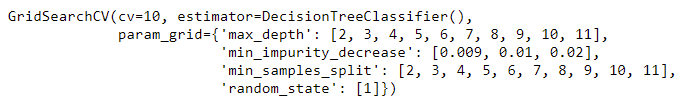

In [ ]:
print('Improved score: ', gridSearch.???)

print('Improved parameters: ', gridSearch.???)

bestClassTree = gridSearch.???

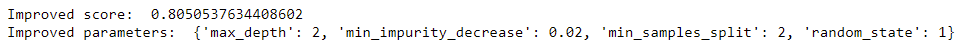

In [ ]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

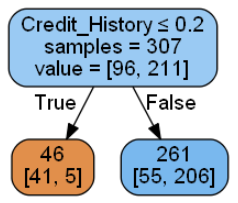

In [ ]:
# Show the classification summaries (confusion matrices) for training and test data



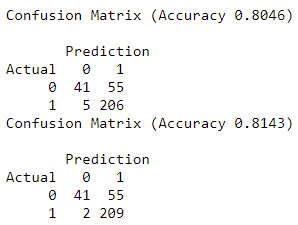

## Grid search for Cost-Complexity Pruning

In [ ]:

param_grid = {
    
    'ccp_alpha': [0.001, 0.005, 0.01, 0.15, 0.02, 0.25]
}

In [ ]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

In [ ]:
print('Cost-Complexity Prune Score: ', gridSearch.best_score_)

print('Best Alpha: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

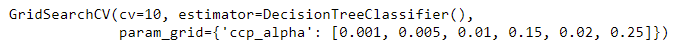

In [ ]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

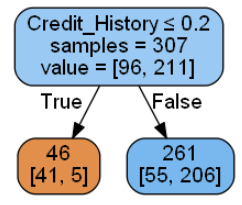

In [ ]:
classificationSummary(train_y, bestClassTree.predict(train_X))
print()
classificationSummary(test_y, bestClassTree.predict(test_X))

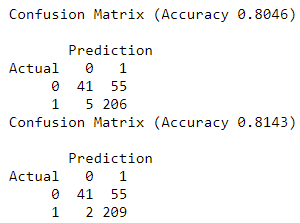

## Regression Trees

#### Instead of using a classification voting scheme, regression trees find the mean response value of each completed node.

In [ ]:
# The ToyotaCorolla dataset shows the sales of used Toyota Corollas in the Netherlands

car_df = pd.read_csv('../resource/lib/public/ToyotaCorolla.csv')

In [ ]:
# We'll change the names of two variables to simplify them

car_df = car_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

In [ ]:
# Show the variable names, non-null counts, and datatypes



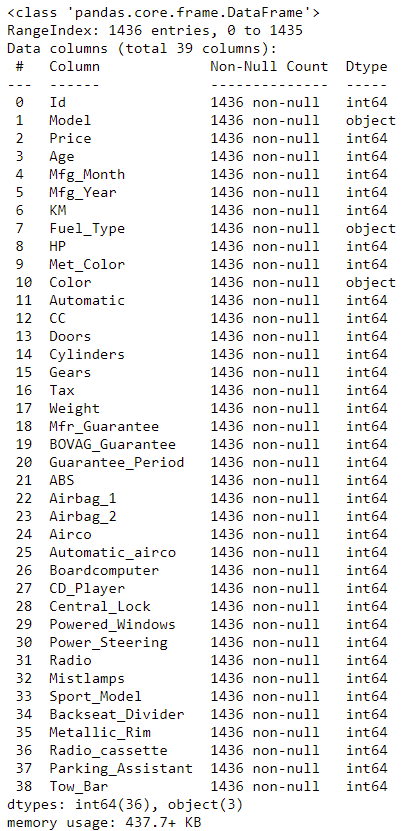

In [ ]:
# We'll create X and y object and one-hot encode X in this cell

X = car_df.drop(columns = [???, 'Id', "Mfg_Month", "Age"])

X = ???.get_dummies(???, drop_first=???)

y = car_df[???]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=1)

### Grid search for Early Stopping

#### Grid search combines cross-validation with hyperparameter searching; grid search works well when you know the ranges of the hyperparameters that you want to check. 

In [ ]:
# user grid search to find optimized tree; initial search pattern

param_grid = {
    'max_depth': [10, 20, 30], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30], 
    'random_state': [1],
}

In [ ]:
gridSearch = GridSearchCV(???, ???, cv=10)

gridSearch.fit(???, ???)

print('Initial parameters: ', gridSearch.best_params_)

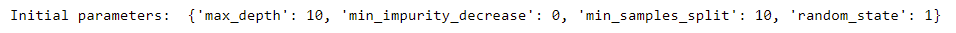

In [ ]:
regressionSummary(train_y, gridSearch.predict(train_X))
print()
regressionSummary(test_y, gridSearch.predict(test_X))

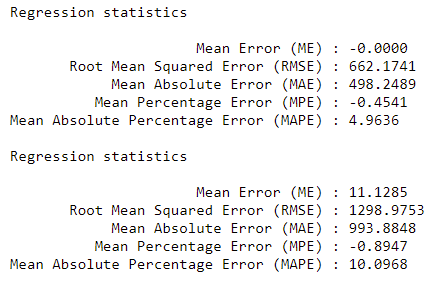

In [ ]:
# refined search grid using parameters from above as guides

param_grid = {
    'max_depth': list(range(3, 12)), 
    'min_impurity_decrease': [0], 
    'min_samples_split': list(range(2, 12)),
    'random_state': [1],
}

In [ ]:
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

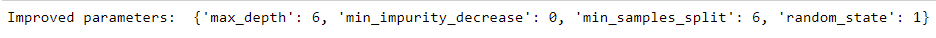

In [ ]:
regressionSummary(train_y, gridSearch.predict(train_X))
print()
regressionSummary(test_y, gridSearch.predict(test_X))

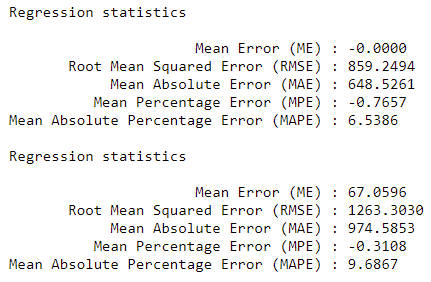

In [ ]:
plotDecisionTree(regTree, feature_names=train_X.columns)

# we rotate the plot to fit all elements
plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)

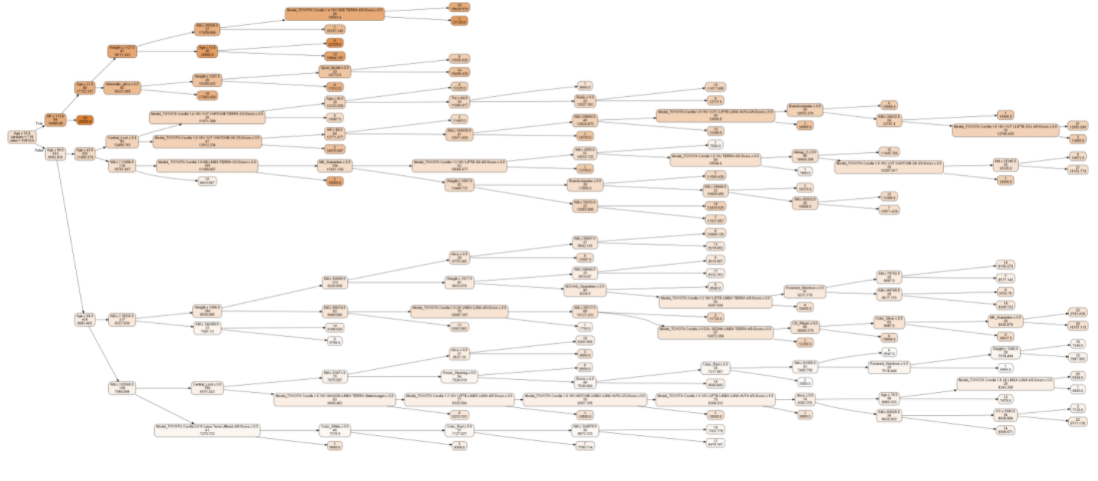

### Grid search for Cost-Complexity Pruning

In [ ]:
param_grid = {
    'ccp_alpha': [0.001, 0.005, 0.01, 0.015, 0.02]
}

In [ ]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

gridSearch.???(train_X, train_y)

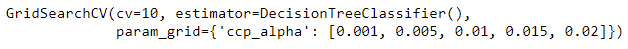

In [ ]:
print('Cost-Complexity Prune Score: ', gridSearch.???)

print('Best Alpha: ', gridSearch.???)

bestClassTree = gridSearch.???

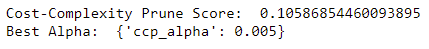

In [ ]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

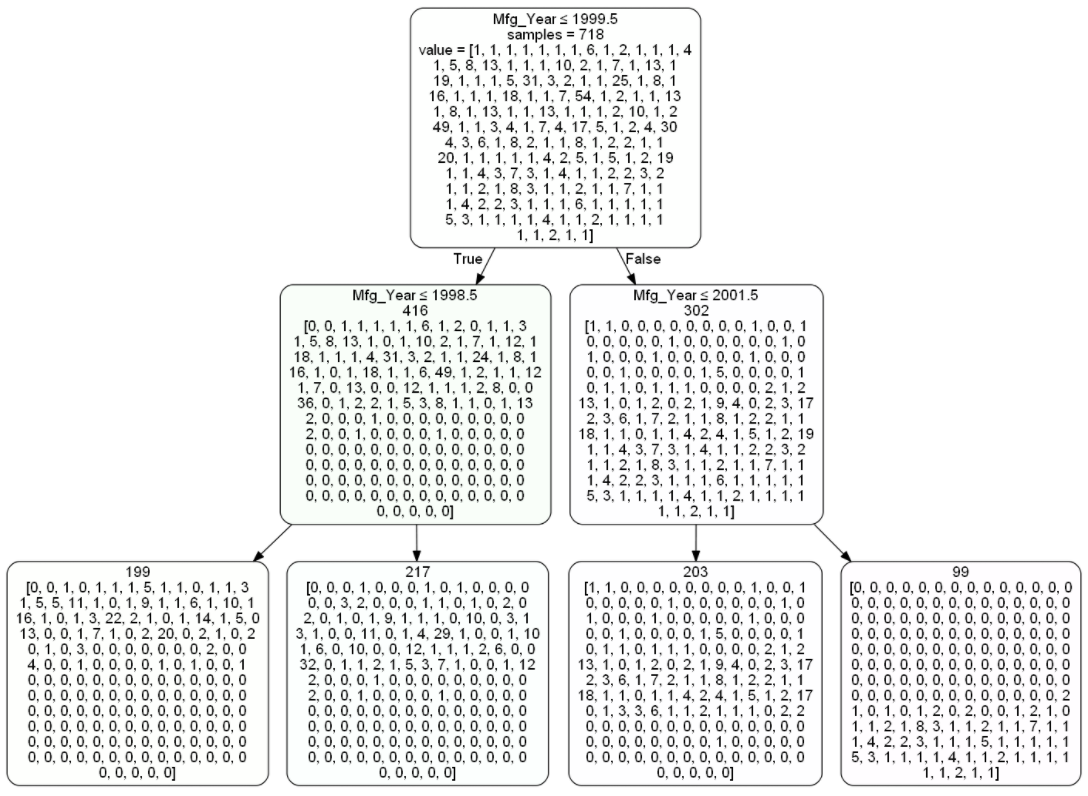

In [ ]:
regressionSummary(train_y, gridSearch.predict(train_X))
print()
regressionSummary(test_y, gridSearch.predict(test_X))

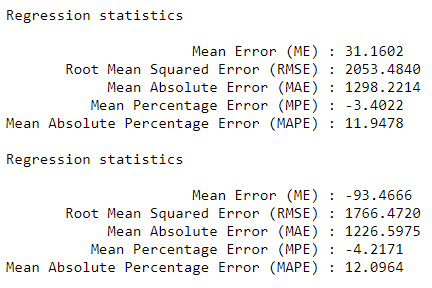